# Run conversion script for Raw_Intan_Ephys_withVideos

In [2]:
from nelson_lab_to_nwb.intan_sessions_converter import session_to_nwb


session_to_nwb(
    output_folder_path="output_intan",
    intan_folder_path="/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_Intan_Ephys_withVideos/pm231213a_240205_240205_120954",
    aim_score_file_path="/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_Intan_Ephys_withVideos/AIM_score.xlsx",
    top_behavioral_video_file_path="/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_Intan_Ephys_withVideos/pm231213a_240205Top.mp4",
    side_behavioral_video_file_path="/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_Intan_Ephys_withVideos/pm231213a_240205Side.mp4",
    user_metadata_file_path="/mnt/shared_storage/Github/nelson-lab-to-nwb/src/nelson_lab_to_nwb/intan_sessions_converter/metadata_example.yaml",
    injection_time_in_seconds=10.0,
    stub_test=True,
    overwrite=True,
    verbose=True,
)

Source data is valid!
Metadata is valid!
conversion_options is valid!
Setting aligned timestamps for video VideoTop.
Setting aligned timestamps for video VideoSide.


/home/luiz/anaconda3/envs/nelson_lab_to_nwb_env/lib/python3.12/site-packages/pynwb/file.py:146: UserWarning: Date is missing timezone information. Updating to local timezone.
  args_to_set['date_of_birth'] = _add_missing_timezone(date_of_birth)


NWB file saved at output_intan/pm231213a_20240205T120954.nwb!
Conversion complete. NWB file saved to: output_intan/pm231213a_20240205T120954.nwb


'output_intan/pm231213a_20240205T120954.nwb'

# Inspect converted data

In [11]:
from pynwb import NWBHDF5IO, NWBFile
from nwbwidgets import nwb2widget
import matplotlib.pyplot as plt
import numpy as np


file_path = "output_intan/pm231213a_20240205T120954.nwb"

io = NWBHDF5IO(file_path, 'r', load_namespaces=True)
nwbfile = io.read()
nwbfile

,location,group,group_name,channel_name,rel_x,rel_y
id,,,,,,
0,unknown,B pynwb.ecephys.ElectrodeGroup at 0x140065416944224\nFields:\n description: Group B electrodes.\n device: Intan pynwb.device.Device at 0x140065367178512\nFields:\n description: Intan recording\n manufacturer: Intan\n\n,B,B-000,450.0,0.0
1,unknown,B pynwb.ecephys.ElectrodeGroup at 0x140065416944224\nFields:\n description: Group B electrodes.\n device: Intan pynwb.device.Device at 0x140065367178512\nFields:\n description: Intan recording\n manufacturer: Intan\n\n,B,B-001,600.0,0.0
2,unknown,B pynwb.ecephys.ElectrodeGroup at 0x140065416944224\nFields:\n description: Group B electrodes.\n device: Intan pynwb.device.Device at 0x140065367178512\nFields:\n description: Intan recording\n manufacturer: Intan\n\n,B,B-002,150.0,150.0
3,unknown,B pynwb.ecephys.ElectrodeGroup at 0x140065416944224\nFields:\n description: Group B electrodes.\n device: Intan pynwb.device.Device at 0x140065367178512\nFields:\n description: Intan recording\n manufacturer: Intan\n\n,B,B-003,300.0,150.0
,location,group,group_name,channel_name,rel_x,rel_y
id,,,,,,
0,unknown,B pynwb.ecephys.ElectrodeGroup at 0x140065416944224\nFields:\n description: Group B electrodes.\n device: Intan pynwb.device.Device at 0x140065367178512\nFields:\n description: Intan recording\n manufacturer: Intan\n\n,B,B-000,450.0,0.0
1,unknown,B pynwb.ecephys.ElectrodeGroup at 0x140065416944224\nFields:\n description: Group B electrodes.\n device: Intan pynwb.device.Device at 0x140065367178512\nFields:\n description: Intan recording\n manufacturer: Intan\n\n,B,B-001,600.0,0.0
2,unknown,B pynwb.ecephys.ElectrodeGroup at 0x140065416944224\nFields:\n description: Group B electrodes.\n device: Intan pynwb.device.Device at 0x140065367178512\nFields:\n description: Intan recording\n manufacturer: Intan\n\n,B,B-002,150.0,150.0


Text(0, 0.5, 'AIM score')

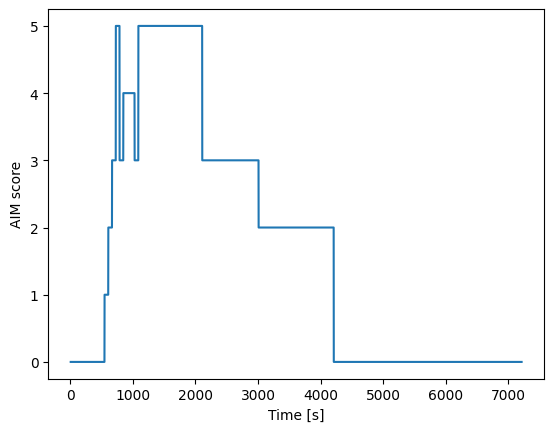

In [12]:
# AIM scores
plt.plot(
    nwbfile.processing["behavior"].data_interfaces["aims"].timestamps[:],
    nwbfile.processing["behavior"].data_interfaces["aims"].data[:]
)
plt.xlabel('Time [s]')
plt.ylabel('AIM score')

Text(0, 0.5, 'Raw traces')

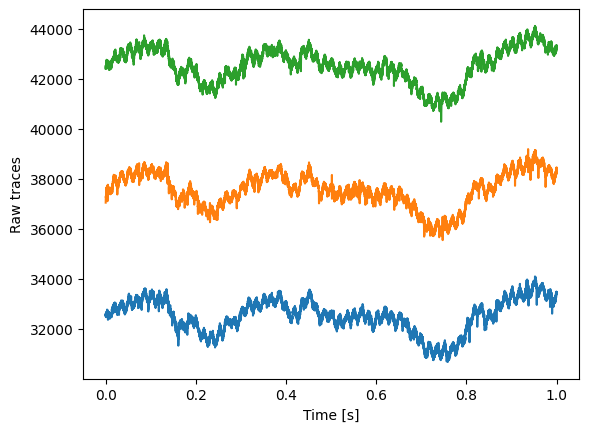

In [18]:
# Electrophysiology traces
plt.plot(
    np.arange(0, 30000) / nwbfile.acquisition["ElectricalSeries"].rate,
    nwbfile.acquisition["ElectricalSeries"].data[30000:60000, 0:3] + np.array([0, 5000, 10000])
)
plt.xlabel('Time [s]')
plt.ylabel('Raw traces')

In [19]:
# visualize the full NWB file with interactive widgets
nwb2widget(nwbfile)

In [ ]:
io.close()